# Introdução

O consumo de alimentos prontos é uma tendência mundial, devido a sua praticidade. 
No mercado existe diversas marcas com diversos apelos, que incluem o marketing com foco em crianças ou adultos, na forma diet ou com açúcar.

Em vista da grande demanda por esse tipo de produto, objetivou-se pesquisar a percepção dos consumidores em relação às suas marcas favoritas de cereais. 

Solicitou-se a cada respondente que avaliasse suas três marcas preferidas tendo em mente cada um dos 25 atributos. 
Uma escala de cinco pontos foi utilizada para indicar a extensão de cada atributo em relação a cada marca.

São apresentados os dados de 12 marcas, com respostas de 116 pessoas em 235 observações.

## Dados

Cereais:

- All Bran
- Cerola Muesli
- Just right
- Kellogg's Corn Flakes
- Komplete
- NutriGrain
- Purina Muesli
- Rice Bubbles
- Special K
- Sustain
- Vitabrit
- Weetbrix

Atributos Sensoriais:

- Satisfaz
- Natural
- Fibra
- Doce
- Fácil
- Sal
- Gratificante
- Energia
- Divertido
- Crianças
- Encharcado
- Econômico
- Saúde
- Família
- Calorias
- Simples
- Crocante
- Regular
- Açúcar
- Fruta
- Processo
- Qualidade
- Prazer
- Chato
- Nutritivo

## Etapas

* Obtenção dos Dados
* Análise Exploratória e Visualização dos dados
* Pré-processamento
* Machine Learning
* Conclusões

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis

In [2]:
df = pd.read_csv ('cereais.csv')

In [3]:
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,637,25,3,4,4,1,4,2,3,3,...,4,3,4,1,1,3,4,2,2,4
231,638,17,5,4,4,3,4,3,4,4,...,1,4,4,3,4,2,4,4,1,4
232,638,25,4,4,4,1,4,1,4,4,...,3,3,4,1,1,2,3,3,2,4
233,639,21,3,3,3,3,4,2,3,3,...,3,2,3,2,1,3,3,2,2,3


In [4]:
df = df.rename(columns={ 'Col1':'Avaliador', 'Col2': 'Cereal'})

In [5]:
df.head()

,Avaliador,Cereal,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [6]:
df['Cereal'] = pd.Categorical(df['Cereal']) 
df['Avaliador'] = pd.Categorical(df['Avaliador']) 

In [7]:
pd.crosstab(index=df['Cereal'], columns='count')  

col_0,count
Cereal,
1,15
3,13
13,16
14,27
15,14
16,24
17,18
19,21
21,23


In [8]:
pd.crosstab(index=df['Avaliador'], columns='count')    

col_0,count
Avaliador,
101,2
103,2
104,3
105,3
106,2
...,...
635,2
636,3
637,2


In [9]:
df = df.rename(columns={
'Col3': 'Satisfaz',
'Col4': 'Natural',
'Col5': 'Fibra',
'Col6': 'Doce',
'Col7': 'Fácil',
'Col8': 'Sal',
'Col9': 'Gratificante',
'Col10': 'Energia',
'Col11': 'Divertido',
'Col12': 'Crianças',
'Col13': 'Encharcado',
'Col14': 'Econômico',
'Col15': 'Saúde',
'Col16': 'Família',
'Col17': 'Calorias',
'Col18': 'Simples',
'Col19': 'Crocante',
'Col20': 'Regular',
'Col21': 'Açúcar',
'Col22': 'Fruta',
'Col23': 'Processo',
'Col24': 'Qualidade',
'Col25': 'Prazer',
'Col26': 'Chato',
'Col27': 'Nutritivo'})

In [10]:
df.head()

,Avaliador,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Simples,Crocante,Regular,Açúcar,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo
0,101,25,5,5,5,1,2,1,5,4,...,3,1,4,1,1,3,5,1,1,5
1,101,21,1,2,2,1,5,2,5,1,...,5,5,1,2,1,5,2,1,1,3
2,103,21,5,4,5,5,5,3,5,5,...,1,5,4,3,1,2,5,4,1,5
3,103,3,5,5,5,3,5,2,5,5,...,1,1,4,2,5,2,5,5,1,5
4,104,14,4,5,3,2,5,2,5,4,...,1,5,3,1,1,3,5,5,1,4


In [11]:
X = df.iloc[:, 2:27]
X

,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,Divertido,Crianças,...,Simples,Crocante,Regular,Açúcar,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo
0,5,5,5,1,2,1,5,4,1,4,...,3,1,4,1,1,3,5,1,1,5
1,1,2,2,1,5,2,5,1,1,5,...,5,5,1,2,1,5,2,1,1,3
2,5,4,5,5,5,3,5,5,5,5,...,1,5,4,3,1,2,5,4,1,5
3,5,5,5,3,5,2,5,5,5,5,...,1,1,4,2,5,2,5,5,1,5
4,4,5,3,2,5,2,5,4,5,5,...,1,5,3,1,1,3,5,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,3,4,4,1,4,2,3,3,2,4,...,4,3,4,1,1,3,4,2,2,4
231,5,4,4,3,4,3,4,4,4,4,...,1,4,4,3,4,2,4,4,1,4
232,4,4,4,1,4,1,4,4,3,4,...,3,3,4,1,1,2,3,3,2,4
233,3,3,3,3,4,2,3,3,2,3,...,3,2,3,2,1,3,3,2,2,3


In [12]:
! pip install factor_analyzer==0.3.2

In [13]:
from factor_analyzer import FactorAnalyzer

In [14]:
#Criando objeto análise de fatores

fa = FactorAnalyzer(n_factors=25, rotation='varimax')
fa.fit(X)

# checando autovalores
ev, v = fa.get_eigenvalues()
ev

array([6.5044682 , 3.8210452 , 2.50199528, 1.68399409, 1.08535397,
       0.93300686, 0.8516405 , 0.78683657, 0.73171687, 0.69585069,
       0.6468294 , 0.54795846, 0.52915688, 0.48962363, 0.41774279,
       0.38707401, 0.362461  , 0.35882947, 0.30475407, 0.27419206,
       0.26244808, 0.24227943, 0.2179754 , 0.19853087, 0.16423623])

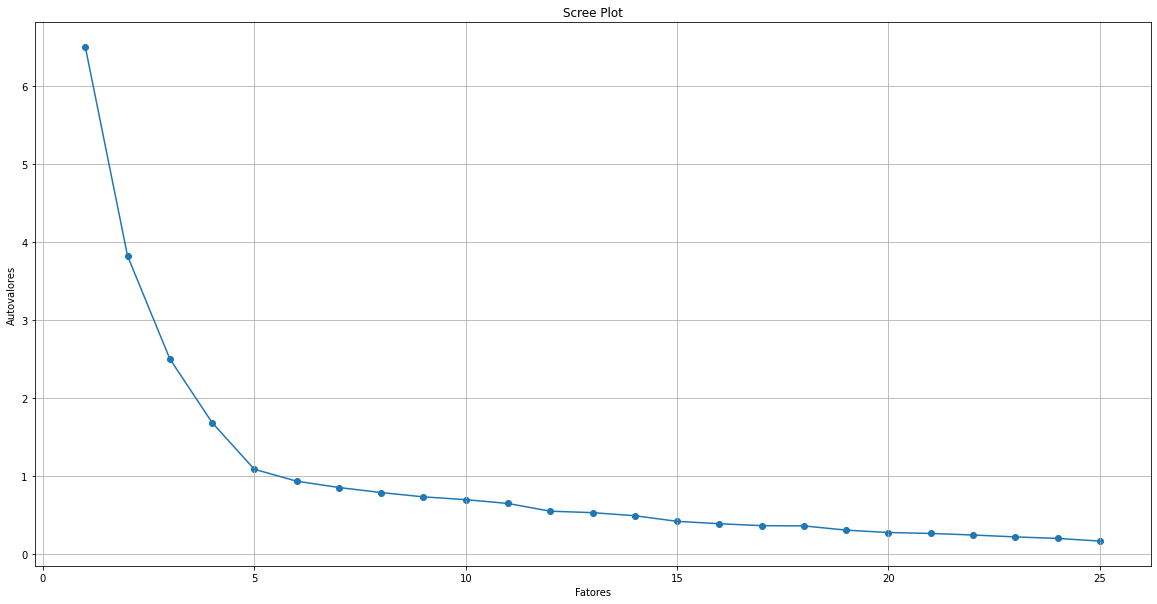

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalores')

plt.grid()
plt.show()

In [16]:
#Considerando 4 fatores

fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(X)

FactorAnalyzer(n_factors=4, rotation=None, rotation_kwargs={})

In [17]:
#Matriz L de cargas estimadas

L = fa.loadings_
np.round(L,2)

array([[ 0.72,  0.1 , -0.07,  0.18],
       [ 0.73, -0.24, -0.11,  0.11],
       [ 0.72, -0.24, -0.31,  0.17],
       [ 0.08,  0.74, -0.21,  0.15],
       [ 0.32,  0.14,  0.2 ,  0.11],
       [-0.21,  0.51, -0.14,  0.41],
       [ 0.72,  0.18,  0.16,  0.17],
       [ 0.7 ,  0.13, -0.07,  0.12],
       [ 0.39,  0.49,  0.21, -0.16],
       [ 0.22,  0.28,  0.76,  0.12],
       [-0.1 , -0.23,  0.15,  0.4 ],
       [ 0.15, -0.23,  0.47,  0.1 ],
       [ 0.81, -0.31, -0.11,  0.08],
       [ 0.31,  0.22,  0.67,  0.03],
       [-0.16,  0.57, -0.17,  0.21],
       [-0.31, -0.36,  0.22,  0.43],
       [ 0.29,  0.45,  0.21, -0.18],
       [ 0.58, -0.13, -0.18,  0.07],
       [-0.25,  0.74, -0.25,  0.25],
       [ 0.37,  0.25, -0.47, -0.15],
       [-0.3 ,  0.27,  0.  ,  0.23],
       [ 0.73, -0.14,  0.05, -0.03],
       [ 0.47,  0.57,  0.07, -0.21],
       [-0.38, -0.26, -0.1 ,  0.34],
       [ 0.8 , -0.22, -0.15,  0.13]])

In [18]:
fa.get_factor_variance()

(array([6.08645102, 3.36420208, 2.05504929, 1.11555394]),
 array([0.24345804, 0.13456808, 0.08220197, 0.04462216]),
 array([0.24345804, 0.37802612, 0.4602281 , 0.50485025]))

In [19]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(X)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [20]:
#Fatores de 1 a 4 com as cargas estimadas

L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = X.columns
L.columns = ['FA1','FA2','FA3','FA4']
L

,FA1,FA2,FA3,FA4
Satisfaz,0.705926,0.088167,0.198221,0.152237
Natural,0.752800,-0.208911,0.054740,0.036777
Fibra,0.821203,-0.116397,-0.120859,0.020583
Doce,0.068946,0.701790,0.071968,0.347628
Fácil,0.238564,0.063576,0.324555,0.065804
Sal,-0.091826,0.685617,0.015718,-0.083106
Gratificante,0.625896,0.076987,0.422415,0.172316
Energia,0.659684,0.078210,0.191243,0.210825
Divertido,0.163479,0.176578,0.415016,0.480073
Crianças,-0.024322,0.035050,0.850781,0.013842


In [21]:
#Arrumando em ordem crescente

L.sort_values(by='FA1',ascending=False).head(10)

,FA1,FA2,FA3,FA4
Nutritivo,0.831418,-0.176957,0.050701,0.056027
Saúde,0.828531,-0.288274,0.051120,0.046116
Fibra,0.821203,-0.116397,-0.120859,0.020583
Natural,0.752800,-0.208911,0.054740,0.036777
Satisfaz,0.705926,0.088167,0.198221,0.152237
Energia,0.659684,0.078210,0.191243,0.210825
Qualidade,0.646587,-0.244715,0.203617,0.171207
Gratificante,0.625896,0.076987,0.422415,0.172316
Regular,0.613091,-0.100074,-0.027949,0.088827
Fruta,0.376150,0.186503,-0.269375,0.441862


In [22]:
#Comunalidades

np.round(fa.get_communalities(),2)

array([0.57, 0.61, 0.7 , 0.62, 0.17, 0.49, 0.61, 0.52, 0.46, 0.73, 0.24,
       0.31, 0.77, 0.59, 0.42, 0.46, 0.36, 0.39, 0.73, 0.44, 0.21, 0.55,
       0.59, 0.34, 0.73])

In [23]:
L.sort_values(by='FA2',ascending=False).head(10)



,FA1,FA2,FA3,FA4
Açúcar,-0.183849,0.816649,-0.053763,0.165341
Doce,0.068946,0.701790,0.071968,0.347628
Sal,-0.091826,0.685617,0.015718,-0.083106
Calorias,-0.113644,0.626649,-0.008372,0.120616
Processo,-0.236000,0.373960,0.026508,-0.125563
Prazer,0.244884,0.233365,0.333632,0.603503
Fruta,0.376150,0.186503,-0.269375,0.441862
Divertido,0.163479,0.176578,0.415016,0.480073
Crocante,0.073932,0.145985,0.370988,0.437885
Satisfaz,0.705926,0.088167,0.198221,0.152237


In [24]:
L.sort_values(by='FA3',ascending=False).head(10)

,FA1,FA2,FA3,FA4
Crianças,-0.024322,0.035050,0.850781,0.013842
Família,0.062455,-0.054532,0.760629,0.093225
Gratificante,0.625896,0.076987,0.422415,0.172316
Econômico,0.068874,-0.280265,0.416057,-0.227187
Divertido,0.163479,0.176578,0.415016,0.480073
Crocante,0.073932,0.145985,0.370988,0.437885
Prazer,0.244884,0.233365,0.333632,0.603503
Fácil,0.238564,0.063576,0.324555,0.065804
Qualidade,0.646587,-0.244715,0.203617,0.171207
Satisfaz,0.705926,0.088167,0.198221,0.152237


In [25]:
L.sort_values(by='FA4',ascending=False).head(10)

,FA1,FA2,FA3,FA4
Prazer,0.244884,0.233365,0.333632,0.603503
Divertido,0.163479,0.176578,0.415016,0.480073
Fruta,0.376150,0.186503,-0.269375,0.441862
Crocante,0.073932,0.145985,0.370988,0.437885
Doce,0.068946,0.701790,0.071968,0.347628
Energia,0.659684,0.078210,0.191243,0.210825
Gratificante,0.625896,0.076987,0.422415,0.172316
Qualidade,0.646587,-0.244715,0.203617,0.171207
Açúcar,-0.183849,0.816649,-0.053763,0.165341
Satisfaz,0.705926,0.088167,0.198221,0.152237


In [26]:
#Variância de cada fator

fa.get_factor_variance()

(array([5.20310473, 2.66037193, 2.46709535, 2.29068432]),
 array([0.20812419, 0.10641488, 0.09868381, 0.09162737]),
 array([0.20812419, 0.31453907, 0.41322288, 0.50485025]))

In [27]:
#Soma da variância

np.sum(fa.get_factor_variance())

14.566842975719176

In [28]:
#Porcentagem da variância explicada

fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.35718822, 0.18263202, 0.16936376, 0.15725331],
       [0.01428753, 0.00730528, 0.00677455, 0.00629013],
       [0.01428753, 0.02159281, 0.02836736, 0.03465749]])

In [29]:
#Porcentagem da variância por cada fator

np.round(fa.get_factor_variance()/np.sum(fa.get_factor_variance()),2)

array([[0.36, 0.18, 0.17, 0.16],
       [0.01, 0.01, 0.01, 0.01],
       [0.01, 0.02, 0.03, 0.03]])

In [30]:
#Atribuindo nomes

df[['Fator1','Fator2','Fator3','Fator4']] = np.array(fa.fit_transform(X))[:, 0:4]

In [31]:
df

,Avaliador,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
0,101,25,5,5,5,1,2,1,5,4,...,1,3,5,1,1,5,1.511203,-1.227816,0.205665,-1.623202
1,101,21,1,2,2,1,5,2,5,1,...,1,5,2,1,1,3,-2.071909,-0.588471,1.374526,-1.162636
2,103,21,5,4,5,5,5,3,5,5,...,1,2,5,4,1,5,1.473021,0.812784,1.088764,0.696806
3,103,3,5,5,5,3,5,2,5,5,...,5,2,5,5,1,5,1.647908,-0.057011,0.503627,1.035769
4,104,14,4,5,3,2,5,2,5,4,...,1,3,5,5,1,4,0.414373,-0.798018,1.162082,1.180994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,637,25,3,4,4,1,4,2,3,3,...,1,3,4,2,2,4,-0.049875,-0.852050,0.007291,-1.038142
231,638,17,5,4,4,3,4,3,4,4,...,4,2,4,4,1,4,0.542971,0.801985,-0.184593,1.278528
232,638,25,4,4,4,1,4,1,4,4,...,1,2,3,3,2,4,0.187454,-0.898705,-0.030857,-0.212396
233,639,21,3,3,3,3,4,2,3,3,...,1,3,3,2,2,3,-0.619609,-0.234930,-0.743400,-0.332749


In [32]:
# Fator1 em ordem crescente

df.sort_values(by='Fator1',ascending=False).head()

,Avaliador,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
40,121,23,5,5,5,5,5,3,5,5,...,4,4,4,5,1,5,1.800709,1.772916,0.594875,0.946000
158,509,24,5,5,5,4,5,4,5,5,...,1,3,3,1,1,5,1.785628,0.970817,-0.017714,-1.697611
31,116,1,5,4,5,1,5,2,5,5,...,1,3,5,2,4,5,1.701156,-0.150973,-1.156637,-0.790033
78,214,24,5,5,5,2,4,1,5,5,...,1,5,5,3,3,5,1.667463,-0.266892,0.957614,-1.141936
3,103,3,5,5,5,3,5,2,5,5,...,5,2,5,5,1,5,1.647908,-0.057011,0.503627,1.035769


In [33]:
df.sort_values(by='Fator2',ascending=False).head()

,Avaliador,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
84,216,16,3,1,2,5,3,4,3,4,...,1,5,1,1,5,1,-2.004780,3.232060,-1.070181,-1.209752
19,110,17,3,4,3,4,5,4,5,3,...,3,5,4,3,1,3,0.106473,2.658713,-1.662884,0.032212
12,107,3,4,4,4,5,5,4,4,4,...,3,3,2,3,2,3,0.014755,2.311869,-0.117537,0.073186
202,623,16,4,2,2,5,4,2,4,3,...,1,5,2,4,2,1,-1.808149,2.130614,0.954689,0.653752
13,107,17,4,4,4,5,5,3,4,4,...,3,3,2,3,2,3,-0.099413,2.065421,0.247917,0.163003


In [34]:
df.sort_values(by='Fator3',ascending=False).head()

,Avaliador,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
14,108,14,4,4,3,4,6,4,6,4,...,2,6,5,6,2,4,0.457386,2.033867,2.395862,0.620719
67,208,16,5,3,3,3,5,1,5,5,...,1,3,5,5,1,5,0.224355,-0.971851,1.603950,1.525069
86,217,16,5,4,3,4,5,3,5,5,...,1,4,5,5,1,4,0.142001,1.139136,1.572300,1.188624
6,104,21,4,4,3,2,5,1,5,5,...,1,3,5,5,1,4,0.343484,-0.613576,1.568627,1.362000
16,109,19,3,2,1,3,5,2,4,2,...,1,1,4,4,1,1,-2.247778,-0.429522,1.528648,0.937863


In [35]:
df.sort_values(by='Fator4',ascending=False).head()

,Avaliador,Cereal,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
163,601,15,5,5,5,4,4,1,5,5,...,5,2,5,5,1,5,1.472228,-0.792083,0.760020,1.935319
52,201,14,2,1,1,2,2,1,2,2,...,1,4,2,4,1,1,-3.546030,-0.699658,0.277092,1.875365
126,402,17,5,4,4,4,5,3,5,5,...,4,3,4,5,1,4,1.237202,1.062782,-1.357242,1.772552
100,307,3,4,4,4,5,4,3,4,3,...,3,2,4,5,1,4,0.286733,1.420207,0.604009,1.582710
99,307,17,4,4,5,4,4,3,4,4,...,3,2,4,5,1,4,0.349466,1.447536,0.295410,1.568211


In [36]:
#Descrição

df[df['Cereal']==23].describe()

,Satisfaz,Natural,Fibra,Doce,Fácil,Sal,Gratificante,Energia,Divertido,Crianças,...,Fruta,Processo,Qualidade,Prazer,Chato,Nutritivo,Fator1,Fator2,Fator3,Fator4
count,12.000000,12.000000,12.000000,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,4.250000,4.166667,4.166667,2.5,4.750000,1.750000,4.416667,4.333333,3.250000,3.333333,...,3.416667,2.583333,4.000000,3.250000,1.333333,4.166667,0.677950,-0.304194,-0.328501,0.856943
std,0.753778,0.717741,0.577350,1.0,0.621582,0.753778,0.514929,0.492366,1.356801,1.302678,...,0.668558,0.792961,0.603023,1.215431,0.651339,0.389249,0.576499,0.918673,0.876071,0.468176
min,3.000000,3.000000,3.000000,1.0,3.000000,1.000000,4.000000,4.000000,1.000000,1.000000,...,2.000000,1.000000,3.000000,1.000000,1.000000,4.000000,-0.271603,-1.175071,-1.690997,-0.183898
25%,4.000000,4.000000,4.000000,2.0,5.000000,1.000000,4.000000,4.000000,2.000000,2.750000,...,3.000000,2.000000,4.000000,2.750000,1.000000,4.000000,0.379106,-0.987525,-0.838936,0.617901
50%,4.000000,4.000000,4.000000,2.0,5.000000,2.000000,4.000000,4.000000,3.000000,3.000000,...,3.500000,3.000000,4.000000,3.000000,1.000000,4.000000,0.563984,-0.534336,-0.364881,0.868307
75%,5.000000,5.000000,4.250000,3.0,5.000000,2.000000,5.000000,5.000000,4.250000,4.250000,...,4.000000,3.000000,4.000000,4.000000,1.250000,4.000000,0.967569,-0.033562,0.244718,1.201676
max,5.000000,5.000000,5.000000,5.0,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,5.000000,5.000000,3.000000,5.000000,1.800709,1.772916,1.194799,1.513775


# Conclusão

Através de 4 fatores consequimos sumarizar os 25 atributos para caracterizar os 12 cereais.

O fator 1 esteve ligado a atributos relacionados a saúde, o fator 2 a características de doçura, calorias, 
o fator 3 ligado a crinças, diversão, família, enquanto que o fator 4 há atributos relacionados a frutas, 
mas sobretudo ao prazer de degustar esse produto.

A partir desses fatores será possível analisar todos os cereais e agrupá-los conforme seus atributos principais.